In [2]:
import pandas as pd
PATH = '../../data/train.csv'

In [4]:
df = pd.read_csv(PATH)
df.head(2)

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000


# EDA

In [7]:
df['priceRange'].value_counts(normalize=True)

priceRange
250000-350000    0.2356
350000-450000    0.2301
450000-650000    0.2275
650000+          0.1819
0-250000         0.1249
Name: proportion, dtype: float64

In [8]:
df['homeType'].value_counts(normalize=True)

homeType
Single Family            0.9427
Condo                    0.0333
Townhouse                0.0113
Multiple Occupancy       0.0060
Residential              0.0027
Apartment                0.0019
Mobile / Manufactured    0.0010
MultiFamily              0.0005
Vacant Land              0.0004
Other                    0.0002
Name: proportion, dtype: float64

In [9]:
df['hasSpa'].value_counts(normalize=True)

hasSpa
False    0.9175
True     0.0825
Name: proportion, dtype: float64

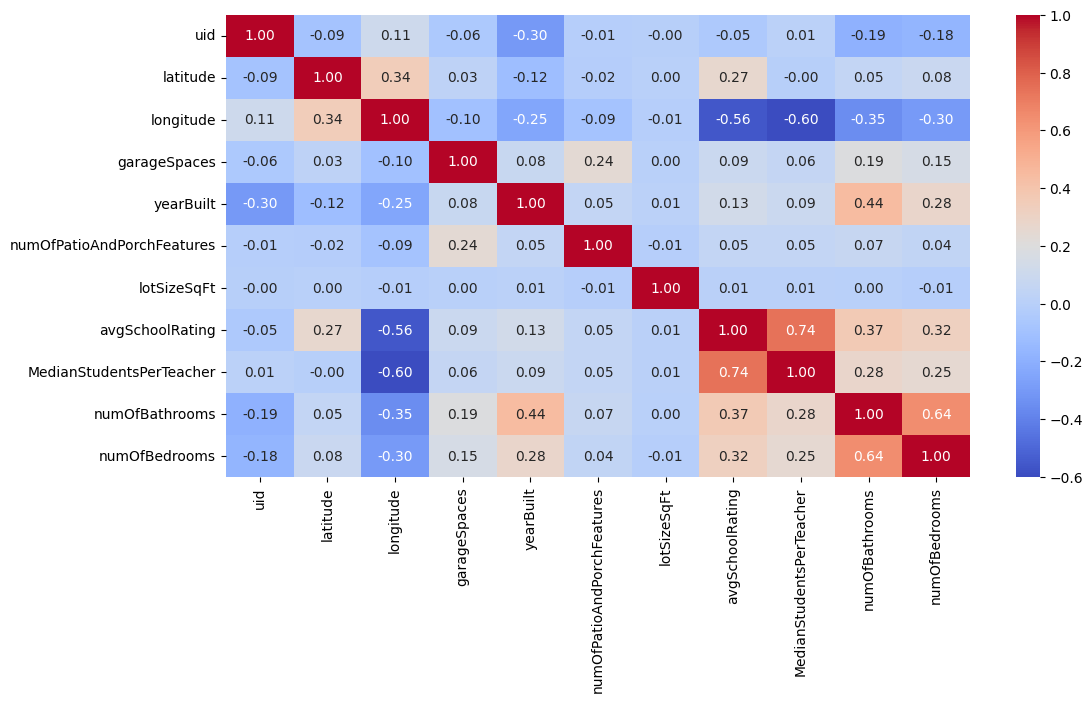

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
df_numeric = df.select_dtypes(include =['number'])
corr_matrix = df_numeric.corr() #pearson correlation

plt.figure(figsize = (12,6))
sns.heatmap(data = corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

# Identify Distributions

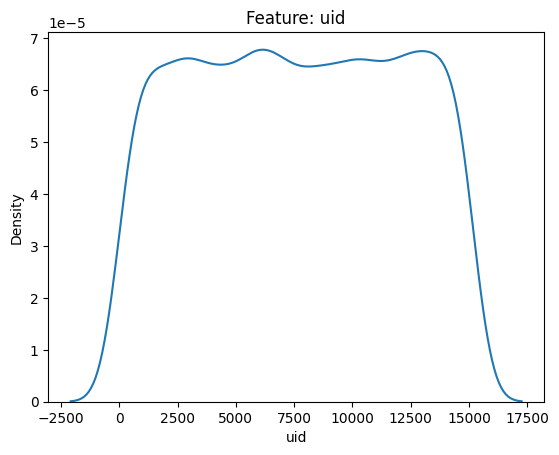

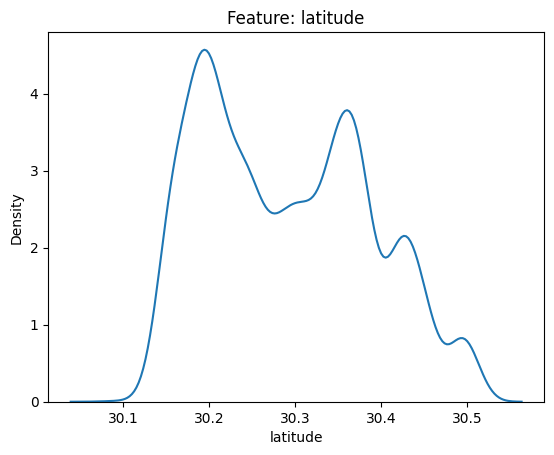

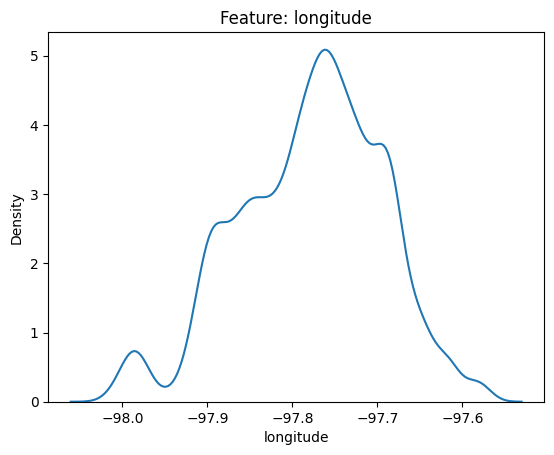

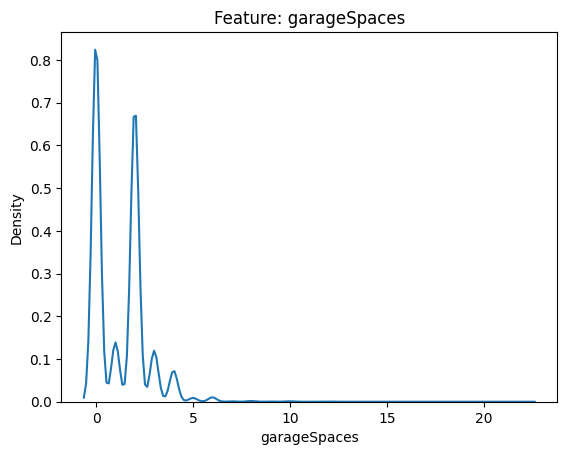

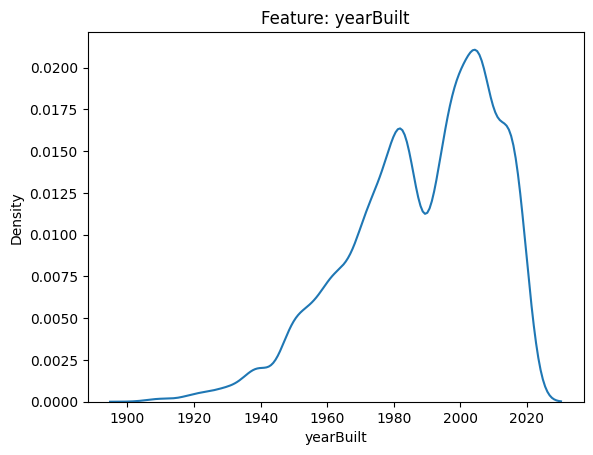

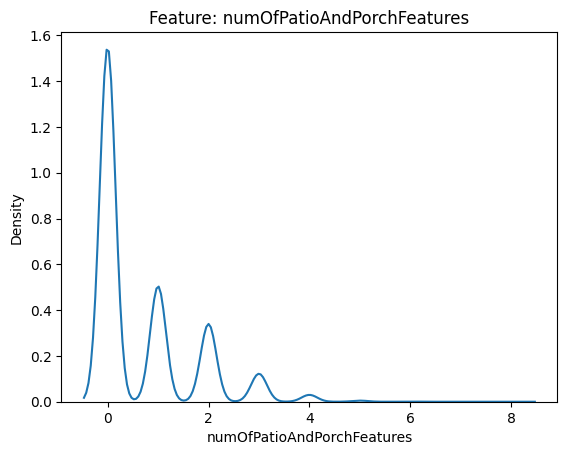

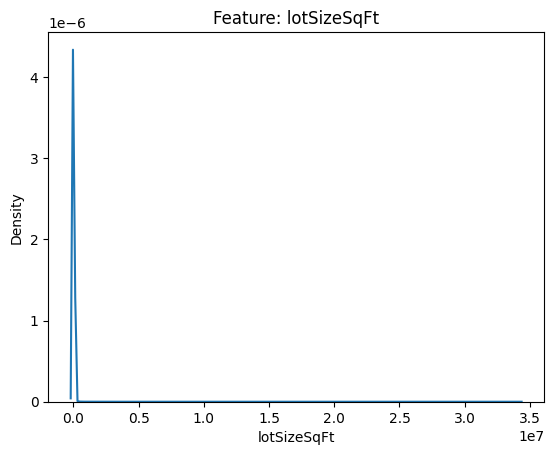

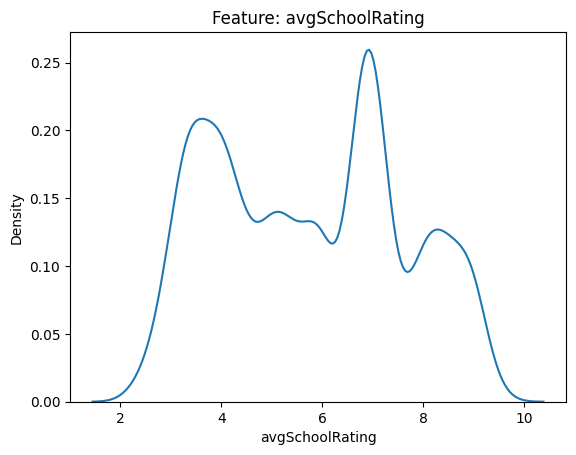

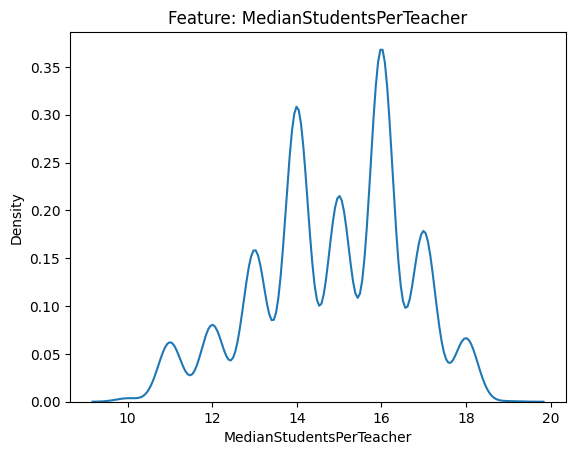

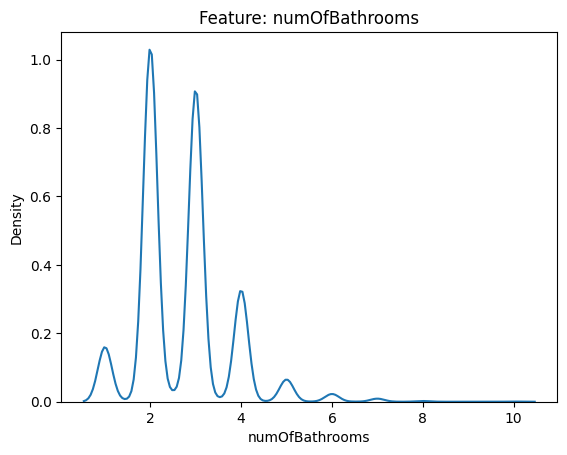

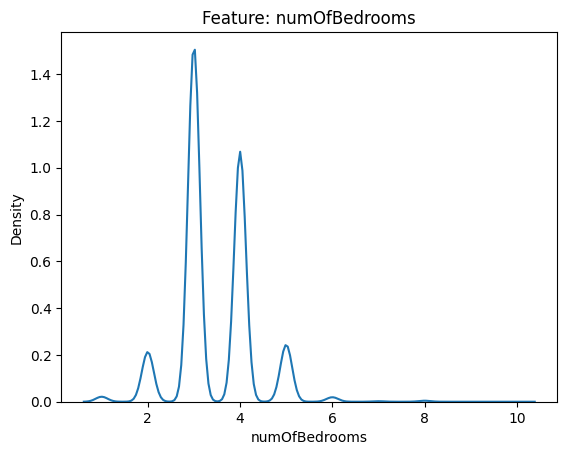

In [13]:
def identify(dataset, feature_list):
    for feature in feature_list:
        sns.kdeplot(x = feature, data =dataset)
        plt.title(f'Feature: {feature}')
        plt.show()
identify(df, df_numeric.columns)

# Data Pre Processing

In [14]:
df['hasSpa'] = df['hasSpa'].apply(lambda x: 1 if x == True else 0)


In [15]:
def aggregate_by_year_built(df):
    bins = [1900, 1920, 1940, 1960, 1980, 2000, 2010, 2021]
    labels =['1900-1920','1920-1940','1940-1960','1960-1980','1980-2000','2000-2010','2010-2020']
    df['yearBuilt_Labels'] = pd.cut(df['yearBuilt'], bins = bins, labels = labels)
    return df

In [18]:
df['homeType'].unique()

array(['Single Family', 'Multiple Occupancy', 'Condo', 'Apartment',
       'MultiFamily', 'Townhouse', 'Other', 'Residential',
       'Mobile / Manufactured', 'Vacant Land'], dtype=object)

In [19]:
def aggregate_by_home_type(value):
    result = ''
    if value in ['Single Family','Townhouse','Mobile / Manufactured']:
        result = 'Single Residential'
    elif value in ['Multiple Occupancy', 'Condo', 'Apartment','MultiFamily']:
        result = 'Multi Residential'
    else:
        result = 'Other'
    return result

In [20]:
df = aggregate_by_year_built(df)
df['homeType_Labels'] = df['homeType'].apply(aggregate_by_home_type)

In [22]:
df.head(2)

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,yearBuilt_Labels,homeType_Labels
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,0,1988,0,102366.0,7.000000,17,4.0,4,650000+,1980-2000,Single Residential
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,0,1997,0,6534.0,6.666667,16,3.0,4,350000-450000,1980-2000,Single Residential


In [23]:
df.shape

(10000, 18)

In [24]:
df_year_built = pd.get_dummies(df['yearBuilt_Labels'], prefix = 'year').replace({True:1, False:0})
df_home_type = pd.get_dummies(df['homeType_Labels'], prefix = 'home_type').replace({True:1, False:0})

/var/folders/4l/xlq2hqg90jl3mj85fjgjkxg40000gr/T/ipykernel_21184/4155321010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_year_built = pd.get_dummies(df['yearBuilt_Labels'], prefix = 'year').replace({True:1, False:0})
/var/folders/4l/xlq2hqg90jl3mj85fjgjkxg40000gr/T/ipykernel_21184/4155321010.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_home_type = pd.get_dummies(df['homeType_Labels'], prefix = 'home_type').replace({True:1, False:0})


In [27]:
df_concat = pd.concat([df, df_year_built, df_home_type],axis=1)

In [29]:
df_concat.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,...,year_1900-1920,year_1920-1940,year_1940-1960,year_1960-1980,year_1980-2000,year_2000-2010,year_2010-2020,home_type_Multi Residential,home_type_Other,home_type_Single Residential
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,0,1988,0,...,0,0,0,0,1,0,0,0,0,1
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,0,1997,0,...,0,0,0,0,1,0,0,0,0,1
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,0,1952,0,...,0,0,1,0,0,0,0,0,0,1
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,0,1976,0,...,0,0,0,1,0,0,0,0,0,1
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,0,1984,0,...,0,0,0,0,1,0,0,0,0,1


# Build the model

In [30]:
df_concat.columns

Index(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'priceRange', 'yearBuilt_Labels',
       'homeType_Labels', 'year_1900-1920', 'year_1920-1940', 'year_1940-1960',
       'year_1960-1980', 'year_1980-2000', 'year_2000-2010', 'year_2010-2020',
       'home_type_Multi Residential', 'home_type_Other',
       'home_type_Single Residential'],
      dtype='object')

In [56]:
SELECT_FEATURES =['latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms','priceRange', 'year_1900-1920', 'year_1920-1940', 'year_1940-1960',
       'year_1960-1980', 'year_1980-2000', 'year_2000-2010', 'year_2010-2020',
       'home_type_Multi Residential', 'home_type_Other',
       'home_type_Single Residential']
df_select_features = df_concat[SELECT_FEATURES]


In [57]:
df_select_features.head(2)

,latitude,longitude,garageSpaces,hasSpa,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,...,year_1900-1920,year_1920-1940,year_1940-1960,year_1960-1980,year_1980-2000,year_2000-2010,year_2010-2020,home_type_Multi Residential,home_type_Other,home_type_Single Residential
0,30.380089,-97.800621,0,0,0,102366.0,7.000000,17,4.0,4,...,0,0,0,0,1,0,0,0,0,1
1,30.199486,-97.859947,0,0,0,6534.0,6.666667,16,3.0,4,...,0,0,0,0,1,0,0,0,0,1


In [59]:
X = df_select_features.drop(['priceRange'],axis=1)
y = df_select_features['priceRange']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [61]:
df_select_features['priceRange'].value_counts()

priceRange
250000-350000    2356
350000-450000    2301
450000-650000    2275
650000+          1819
0-250000         1249
Name: count, dtype: int64

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
def metrics_gen(y_true, y_pred, average = 'weighted'):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average),
        'recall': recall_score(y_true, y_pred, average=average),
        'f1_score': f1_score(y_true, y_pred, average=average),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'classification_report': classification_report(y_true, y_pred,)
    }
    return metrics


In [64]:
y_pred=  rfc.predict(X_test)
metrics = metrics_gen(y_test, y_pred)

In [65]:
metrics

{'accuracy': 0.6108,
 'precision': 0.616236583454877,
 'recall': 0.6108,
 'f1_score': 0.610493984902919,
 'confusion_matrix': array([[159, 118,  38,  11,   2],
        [ 58, 358, 136,  27,   8],
        [  7, 134, 320, 112,  11],
        [  1,  18, 115, 347,  82],
        [  0,   2,   6,  87, 343]]),
 'classification_report': '               precision    recall  f1-score   support\n\n     0-250000       0.71      0.48      0.58       328\n250000-350000       0.57      0.61      0.59       587\n350000-450000       0.52      0.55      0.53       584\n450000-650000       0.59      0.62      0.61       563\n      650000+       0.77      0.78      0.78       438\n\n     accuracy                           0.61      2500\n    macro avg       0.63      0.61      0.62      2500\n weighted avg       0.62      0.61      0.61      2500\n'}

In [66]:
print(metrics['classification_report'])

               precision    recall  f1-score   support

     0-250000       0.71      0.48      0.58       328
250000-350000       0.57      0.61      0.59       587
350000-450000       0.52      0.55      0.53       584
450000-650000       0.59      0.62      0.61       563
      650000+       0.77      0.78      0.78       438

     accuracy                           0.61      2500
    macro avg       0.63      0.61      0.62      2500
 weighted avg       0.62      0.61      0.61      2500



In [67]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np 
param_dist = {
    'n_estimators': np.arange(50,500,50),
    'max_depth': [2,5,10],
    'min_samples_split': [2,5],
    'max_features':['sqrt','log']
}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    rfc, param_distributions= param_dist, n_iter = 30,scoring = 'accuracy', cv = 10,
    verbose = 2, random_state = 42, n_jobs = -1
)
random_search.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=2, max_features=sqr

/Users/thiago.montenegro/fullstack_case/fullstack/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
130 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
94 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/thiago.montenegro/fullstack_case/fullstack/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/thiago.montenegro/fullstack_case/fullstack/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/thiago.montenegro/fullstack_case/fullstack/lib/python3.10/sit

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 10],
                                        'max_features': ['sqrt', 'log'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='accuracy', verbose=2)

In [68]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
metrics_best_rf = metrics_gen(y_test, y_pred)

In [69]:
metrics_best_rf

{'accuracy': 0.612,
 'precision': 0.6237913485866933,
 'recall': 0.612,
 'f1_score': 0.6093785933311194,
 'confusion_matrix': array([[149, 130,  40,   7,   2],
        [ 34, 412, 112,  21,   8],
        [  2, 168, 282, 120,  12],
        [  0,  22, 106, 344,  91],
        [  0,   4,   5,  86, 343]]),
 'classification_report': '               precision    recall  f1-score   support\n\n     0-250000       0.81      0.45      0.58       328\n250000-350000       0.56      0.70      0.62       587\n350000-450000       0.52      0.48      0.50       584\n450000-650000       0.60      0.61      0.60       563\n      650000+       0.75      0.78      0.77       438\n\n     accuracy                           0.61      2500\n    macro avg       0.65      0.61      0.61      2500\n weighted avg       0.62      0.61      0.61      2500\n'}

In [70]:
print(metrics_best_rf['classification_report'])

               precision    recall  f1-score   support

     0-250000       0.81      0.45      0.58       328
250000-350000       0.56      0.70      0.62       587
350000-450000       0.52      0.48      0.50       584
450000-650000       0.60      0.61      0.60       563
      650000+       0.75      0.78      0.77       438

     accuracy                           0.61      2500
    macro avg       0.65      0.61      0.61      2500
 weighted avg       0.62      0.61      0.61      2500



In [71]:
import pickle 

with open('model.pkl','wb') as file: 
    pickle.dump(best_rf, file)